# Health Insurance Cross Sell Prediction

### Постановка задачи

Наш клиент-страховая компания, которая предоставила своим клиентам медицинскую страховку, теперь им нужна ваша помощь в построении модели для прогнозирования того, будут ли страхователи (клиенты) из прошлого года также заинтересованы в страховании транспортных средств, предоставляемых компанией.

Страховой полис - это соглашение, в соответствии с которым компания обязуется предоставить гарантию возмещения определенных убытков, ущерба, болезни или смерти в обмен на выплату определенного взноса. Взнос -это сумма денег, которую клиент должен регулярно выплачивать страховой компании за эту гарантию.

Например, вы можете заплатить взнос в размере 5000 рупий каждый год за медицинскую страховку в размере 200 000 рупий - так что если, не дай Бог, вы заболеете и вам понадобится госпитализация в этом году, страховая компания возьмет на себя расходы по госпитализации и т. д. на сумму до 200,000 рупий. Теперь, если вам интересно, как компания может нести такие высокие расходы на госпитализацию, когда она взимает взнос всего 5000 в рупиях, вот где появляется понятие вероятностей. Например, как и вы, может быть 100 клиентов, которые будут платить взнос в рупиях, 5000 каждый год, но только некоторые из них (скажем, 2-3) будут госпитализированы в этом году, и не все. Таким образом, каждый делит риск со всеми остальными.

Точно так же, как медицинское страхование, существует страхование транспортных средств, где каждый год клиент должен платить взнос в размере определенной суммы страховой компании, чтобы в случае несчастного случая с транспортным средством страховая компания предоставила клиенту компенсацию (называемую "гарантированной суммой").

### Цель

Построение модели для прогнозирования того, будет ли клиент заинтересован в страховании транспортных средств - чрезвычайно полезно для компании, поскольку компания может соответствующим образом планировать свою коммуникационную стратегию, чтобы охватить этих клиентов и оптимизировать свою бизнес-модель и, в последствии, доход.

Теперь, чтобы предсказать, будет ли клиент заинтересован в страховании автомобиля, у нас есть информация о демографии (пол, возраст, код региона), транспортных средствах (возраст автомобиля, ущерб), полисе (премия, канал поиска) и т. д.


### Признаки:

    Variable                        Definition
    id	                            Unique ID for the customer
    Gender	                        Gender of the customer
    Age	                            Age of the customer
    Driving_License	    0 :         Customer does not have DL, 
                        1 :         Customer already has DL
    Region_Code	                    Unique code for the region of the customer
    Previously_Insured	1 :         Customer already has Vehicle Insurance, 
                        0 :         Customer doesn't have Vehicle Insurance
    Vehicle_Age	                    Age of the Vehicle
    Vehicle_Damage	    1 :         Customer got his/her vehicle damaged in the past. 
                        0 :         Customer didn't get his/her vehicle damaged in the past.
    Annual_Premium	                The amount customer needs to pay as premium in the year
    PolicySalesChannel	            Anonymized Code for the channel of outreaching to the customer 
    Vintage	                        Number of Days, Customer has been associated with the company
    
### Импортируем библиотеки:

pip install matplotlib

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,  cross_val_score, cross_validate
from sklearn.metrics import roc_auc_score, roc_curve, auc
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from pandas.plotting import scatter_matrix
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, classification_report

### Импортируем датасет:

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
train.shape

(381109, 12)

### Посмотрим на число пропусков в каждом признаке.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
id                      381109 non-null int64
Gender                  381109 non-null object
Age                     381109 non-null int64
Driving_License         381109 non-null int64
Region_Code             381109 non-null float64
Previously_Insured      381109 non-null int64
Vehicle_Age             381109 non-null object
Vehicle_Damage          381109 non-null object
Annual_Premium          381109 non-null float64
Policy_Sales_Channel    381109 non-null float64
Vintage                 381109 non-null int64
Response                381109 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
id                      127037 non-null int64
Gender                  127037 non-null object
Age                     127037 non-null int64
Driving_License         127037 non-null int64
Region_Code             127037 non-null float64
Previously_Insured      127037 non-null int64
Vehicle_Age             127037 non-null object
Vehicle_Damage          127037 non-null object
Annual_Premium          127037 non-null float64
Policy_Sales_Channel    127037 non-null float64
Vintage                 127037 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [9]:
train.isnull().any().any()

False

In [10]:
test.isnull().any().any()

False

как мы видим, пропусков нет

In [11]:
numerical_columns=['Age', 'Region_Code','Annual_Premium','Vintage']
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [12]:
train[numerical_columns].describe()

,Age,Region_Code,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,154.347397
std,15.511611,13.229888,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,15.000000,24405.000000,82.000000
50%,36.000000,28.000000,31669.000000,154.000000
75%,49.000000,35.000000,39400.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


In [13]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


### Целевая переменная (Response)

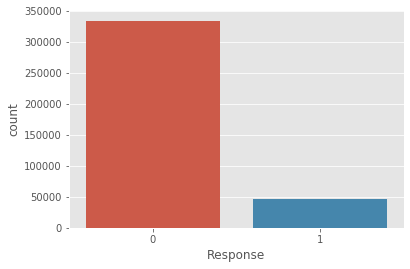

In [14]:
sns.countplot(train.Response)

In [15]:
train.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

### Возрастное распределение клиентов (Age)

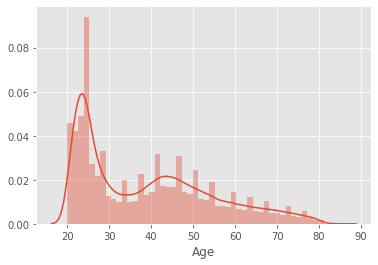

In [16]:
sns.distplot(train.Age)

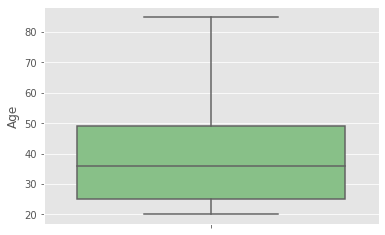

In [17]:
sns.boxplot(y = 'Age', data = train,palette='Accent')

### Age и Annual premium

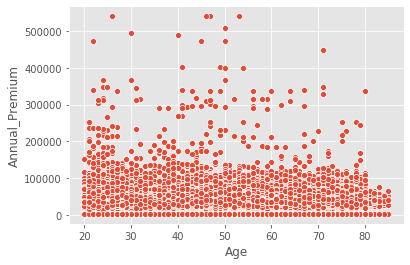

In [18]:
sns.scatterplot(x=train['Age'],y=train['Annual_Premium'])

### Пол клиента (gender)

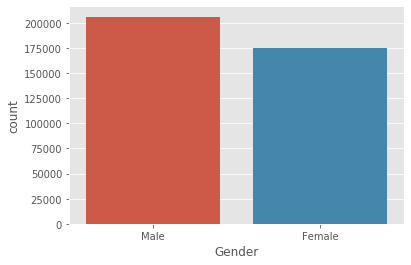

In [19]:
sns.countplot(train.Gender)

In [20]:
df=train.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

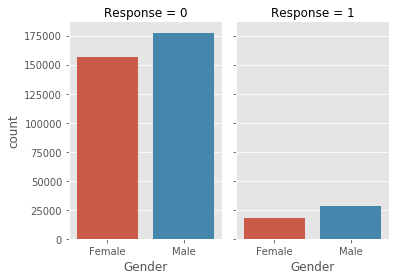

In [21]:
g = sns.catplot(x="Gender", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

### Водительские права и пол водителя

In [22]:
df=train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()

In [23]:
df

,Gender,Driving_License
0,Female,175020
1,Male,206089


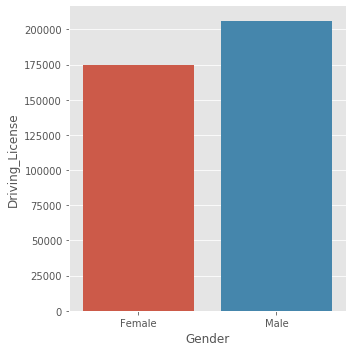

In [24]:
sns.catplot(x="Gender", y="Driving_License",
                data=df, kind="bar");

### Клиенты, уже имеющие страховку автомобиля

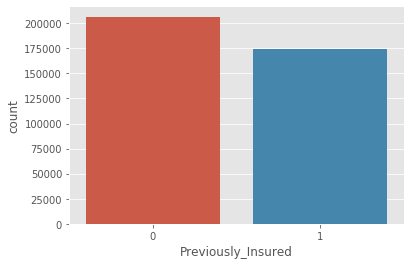

In [25]:
sns.countplot(train.Previously_Insured)

### Возраст автомобиля (Vehicle Age)

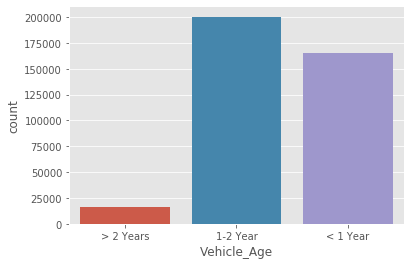

In [26]:
sns.countplot(train.Vehicle_Age)

### Возраст автомобиля и целевое значение (response)

In [27]:
df=train.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


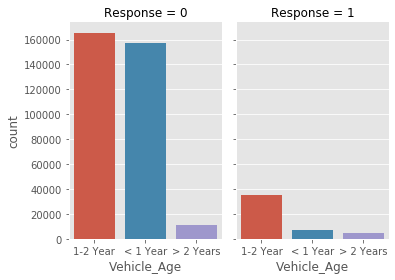

In [28]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

### Клиенты, имеющие повреждённый автомобиль

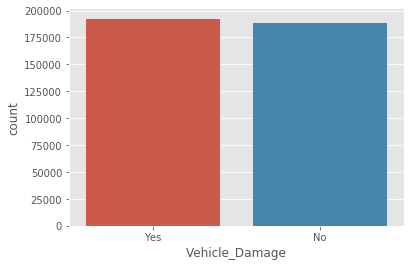

In [29]:
sns.countplot(train.Vehicle_Damage)

### Повреждённый автомобиль и целевое значение (response)

In [30]:
df=train.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

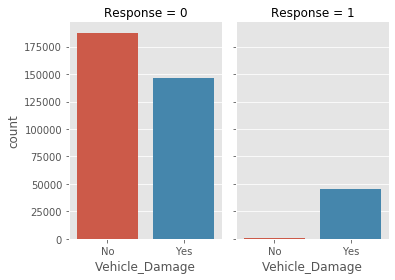

In [31]:
g = sns.catplot(x="Vehicle_Damage", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

### Распределение годовых взносов (Annual Premium)

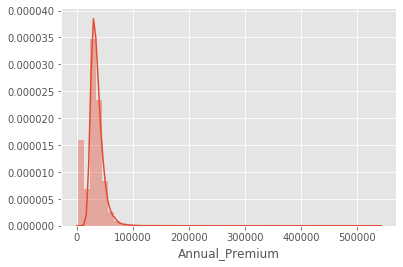

In [32]:
sns.distplot(train.Annual_Premium)

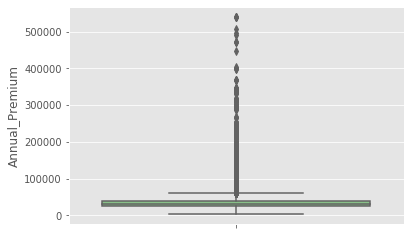

In [33]:
sns.boxplot(y = 'Annual_Premium', data = train,palette='Accent')

### Количество дней, в течение которых клиент был связан с компанией (Vintage)

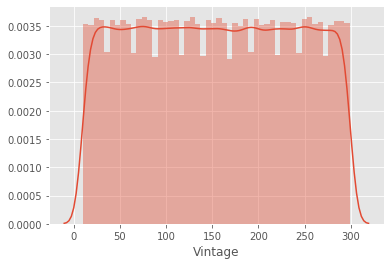

In [34]:
sns.distplot(train.Vintage)

## Предварительная обработка данных


Разделеним на обучающую выборку и целевую переменную

In [35]:
X = train.drop(('Response'), axis=1) 
y = train['Response']


Удалим столбец "id", т.к. он нам не понадобится

In [36]:
test=test.drop(('id'), axis=1)

In [37]:
train.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


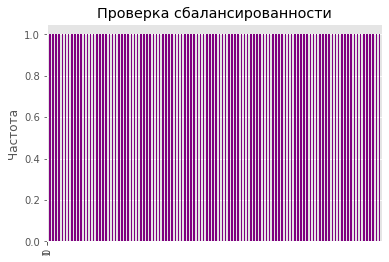

In [39]:
count_class = pd.value_counts(train.iloc[:, [0]].values.ravel(), sort= True).sort_index()
count_class.plot(kind = "bar", color = "Purple")
plt.ylabel("Частота")
plt.xticks(np.arange(2), ('0', '1'))
plt.title("Проверка сбалансированности")
plt.show()

In [40]:
print(roc_auc)

NameError: name 'roc_auc' is not defined

### Возраст автомобиля (Vehicle Age)

### Возраст автомобиля (Vehicle Age)

### Возраст автомобиля (Vehicle Age)

# 

In [31]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year','Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [32]:
train['Gender'] = train['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [33]:
train=pd.get_dummies(train,drop_first=True)

In [34]:
train=train.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
train['Vehicle_Age_lt_1_Year']=train['Vehicle_Age_lt_1_Year'].astype('int')
train['Vehicle_Age_gt_2_Years']=train['Vehicle_Age_gt_2_Years'].astype('int')
train['Vehicle_Damage_Yes']=train['Vehicle_Damage_Yes'].astype('int')

In [35]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
train[num_feat] = ss.fit_transform(train[num_feat])


mm = MinMaxScaler()
train[['Annual_Premium']] = mm.fit_transform(train[['Annual_Premium']])

In [36]:
train=train.drop('id',axis=1)

In [37]:
for column in cat_feat:
    train[column] = train[column].astype('str')

In [38]:
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,1,0,1,1
1,1,2.396751,1,3.0,0,0.057496,26.0,0.342443,0,0,0,0
2,1,0.527181,1,28.0,0,0.066347,26.0,-1.521998,1,0,1,1
3,1,-1.148985,1,11.0,1,0.048348,152.0,0.581474,0,1,0,0
4,0,-0.633242,1,41.0,1,0.046259,152.0,-1.378580,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,2.267815,1,26.0,1,0.051234,26.0,-0.792954,0,0,0,0
381105,1,-0.568774,1,37.0,1,0.069551,152.0,-0.279037,0,1,0,0
381106,1,-1.148985,1,30.0,1,0.060439,160.0,0.079509,0,1,0,0
381107,0,1.881007,1,14.0,0,0.078110,124.0,-0.960275,0,0,1,1


In [39]:
test['Gender'] = test['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
test=pd.get_dummies(test,drop_first=True)
test=test.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
test['Vehicle_Age_lt_1_Year']=test['Vehicle_Age_lt_1_Year'].astype('int')
test['Vehicle_Age_gt_2_Years']=test['Vehicle_Age_gt_2_Years'].astype('int')
test['Vehicle_Damage_Yes']=test['Vehicle_Damage_Yes'].astype('int')

In [40]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
test[num_feat] = ss.fit_transform(test[num_feat])


mm = MinMaxScaler()
test[['Annual_Premium']] = mm.fit_transform(test[['Annual_Premium']])

In [41]:
for column in cat_feat:
    test[column] = test[column].astype('str')

In [42]:
from sklearn.model_selection import train_test_split

train_target=train['Response']
train=train.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)

In [43]:
id=test.id

In [44]:
test=test.drop('id',axis=1)

In [45]:
x_train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Vehicle_Age_lt_1_Year', 'Vehicle_Age_gt_2_Years',
       'Vehicle_Damage_Yes'],
      dtype='object')

<font size="+3" color='#540b11'><b> Data Modelling and Evaluation </b> </font>

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from scipy.stats import randint
import pickle
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

# Random Forest Classifier

In [47]:
x_train.dtypes

Gender                     object
Age                       float64
Driving_License            object
Region_Code                object
Previously_Insured         object
Annual_Premium            float64
Policy_Sales_Channel       object
Vintage                   float64
Vehicle_Age_lt_1_Year      object
Vehicle_Age_gt_2_Years     object
Vehicle_Damage_Yes         object
dtype: object

In [48]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [5,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
exception calling callback for <Future at 0x1ad949d0a08 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\Users\Lesha\Anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\Lesha\Anaconda3\lib\site-packages\joblib\parallel.py", line 309, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\Lesha\Anaconda3\lib\site-packages\joblib\parallel.py", line 731, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\Lesha\Anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Lesha\Anaconda3\lib\site-packages\joblib\parallel.py", line 716, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\Lesha\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", lin

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

## Сохранение модели

In [ ]:
filename = 'rf_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
filename = 'rf_model.sav'

In [ ]:
rf_load = pickle.load(open(filename, 'rb'))

# Evaluate Model 

In [ ]:
y_pred=model.predict(x_test)

## Classification Report 

In [ ]:
print (classification_report(y_test, y_pred))

## ROC кривая & AUC of Random forest classifier

In [ ]:
y_score = model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('Random Forest ROC curve: CC Fraud')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [ ]:
roc_auc_score(y_test, y_score)

# XGBoost Classifier 

In [ ]:
for column in cat_feat:
    x_train[column] = x_train[column].astype('int')
    x_test[column] = x_test[column].astype('int')

In [ ]:
space={ 'max_depth': hp.quniform("max_depth", 3,18,1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 300,
        'seed': 0
      }

In [ ]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( x_train, y_train), ( x_test, y_test)]
    
    clf.fit(x_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(x_test)
    y_score = model.predict_proba(x_test)[:,1]
    accuracy = accuracy_score(y_test, pred>0.5)
    Roc_Auc_Score = roc_auc_score(y_test, y_score)
    print ("ROC-AUC Score:",Roc_Auc_Score)
    print ("SCORE:", accuracy)
    return {'loss': -Roc_Auc_Score, 'status': STATUS_OK }


In [ ]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [ ]:
trials = Trials()

In [ ]:

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

In [ ]:
xgb_model=xgb.XGBClassifier(n_estimators = space['n_estimators'], max_depth = best, gamma = 4.0388607178326605, reg_lambda = 0.26955899476862166,
                            reg_alpha = 66.0, min_child_weight=4.0,colsample_bytree = 0.8844758548525424 )
    

In [ ]:
xgb_model.fit(x_train,y_train)

In [ ]:
filename = 'xgboost_model.sav'
pickle.dump(xgb_model, open(filename, 'wb'))

## ROC кривая & AUC of XG boost classifier

In [ ]:
y_score = xgb_model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('XGBoost ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [ ]:
random_state=42
n_iter=50
num_folds=2
kf = KFold(n_splits=num_folds, random_state=random_state,shuffle=True)

In [ ]:
def gb_mse_cv(params, random_state=random_state, cv=kf, X=x_train, y=y_train):
    # the function gets a set of variable parameters in "param"
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
              'learning_rate': params['learning_rate'],
              'gamma': params['gamma'],
              'reg_alpha' : params['reg_alpha'],
              'reg_lambda' : params['reg_lambda'],
              'colsample_bytree' : params['colsample_bytree'],
              'min_child_weight' : params['min_child_weight']
             }
            
            
    
    # we use this params to create a new LGBM Regressor
    model = lgb.LGBMClassifier(random_state=42, **params)
    
    # and then conduct the cross validation with the same folds as before
    score = -cross_val_score(model, X, y, cv=cv, scoring="roc_auc", n_jobs=-1).mean()

    return score

In [ ]:
%%time

# possible values of parameters
space={'n_estimators': hp.quniform('n_estimators', 100, 200, 1),
       'max_depth' : hp.quniform('max_depth', 2, 8, 1),
       'learning_rate': hp.loguniform("learning_rate",-4,-1),
        'gamma': hp.quniform('gamma',0.1,0.5,0.1),
        'reg_alpha' : hp.quniform('reg_alpha',1.1,1.5,0.1),
        'reg_lambda' : hp.uniform('reg_lambda',1.1,1.5),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.1,0.5),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
      }

# trials will contain logging information
trials = Trials()

best=fmin(fn=gb_mse_cv, # function to optimize
          space=space, 
          algo=tpe.suggest, # optimization algorithm, hyperotp will select its parameters automatically
          max_evals=n_iter, # maximum number of iterations
          trials=trials, # logging
          rstate=np.random.RandomState(random_state) # fixing random state for the reproducibility
         )

# computing the score on the test set
model = lgb.LGBMClassifier(random_state=random_state, n_estimators=int(best['n_estimators']),
                           max_depth=int(best['max_depth']),learning_rate=best['learning_rate'],gamma=best['gamma'],
                           reg_alpha=best['reg_alpha'],reg_lambda=best['reg_lambda'],colsample_bytree=best['colsample_bytree'],
                           min_child_weight=best['min_child_weight'])
model.fit(x_train,y_train)

preds = [pred[1] for pred in model.predict_proba(x_test)]
score = roc_auc_score(y_test, preds, average = 'weighted')


In [ ]:
best

In [ ]:
print("auc-roc score on Test data",score)

In [ ]:
y_score = model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('LGBM ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

# CatBoost 

In [ ]:
#X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat, Y_cat, test_size = 0.22, random_state = 22, stratify = Y_cat, shuffle = True)

cat_model = CatBoostClassifier()
cat_model = cat_model.fit(x_train, y_train, cat_features = cat_feat, eval_set = (x_test, y_test), early_stopping_rounds = 10, verbose = 100)

predictions = [pred[1] for pred in cat_model.predict_proba(x_test)]
print('Validation ROC AUC Score:', roc_auc_score(y_test, predictions, average = 'weighted'))

# Оценка на тестовых данных 

## Catboost

In [ ]:
test

In [ ]:
Preds = [pred[1] for pred in cat_model.predict_proba(test)]

In [ ]:
submission = pd.DataFrame(data = {'id': id, 'Response': Preds})
submission.to_csv('vehicle_insurance_catboost.csv', index = False)
submission.head()

## LGBM 

In [ ]:
id=test.id
#test.drop(['id'],axis=1,inplace=True)

In [ ]:
test['Gender'] = test['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
test=pd.get_dummies(test,drop_first=True)
test=test.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
test=test.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})

In [ ]:
Preds = [pred[1] for pred in model.predict_proba(test)]

In [ ]:
submission = pd.DataFrame(data = {'id': id, 'Response': Preds})
submission.to_csv('vehicle_insurance.csv', index = False)
submission.head()